Mounted at /content/drive
  codUFisica;Period;Energy_SIMEL;Fecha;Year;Month;Day
0      SOLAR;1;0.000000;2021-01-01 00:00:00;2021;1;1 
1      SOLAR;2;0.000000;2021-01-01 00:00:00;2021;1;1 
2      SOLAR;3;0.000000;2021-01-01 00:00:00;2021;1;1 
3      SOLAR;4;0.000000;2021-01-01 00:00:00;2021;1;1 
4      SOLAR;5;0.000000;2021-01-01 00:00:00;2021;1;1 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25163 entries, 0 to 25162
Data columns (total 1 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   codUFisica;Period;Energy_SIMEL;Fecha;Year;Month;Day  25163 non-null  object
dtypes: object(1)
memory usage: 196.7+ KB
None
Tipos de Datos:
codUFisica;Period;Energy_SIMEL;Fecha;Year;Month;Day    object
dtype: object
codUFisica              object
Period                   Int64
Energy_SIMEL           float64
Fecha           datetime64[ns]
Year                     Int64
Month

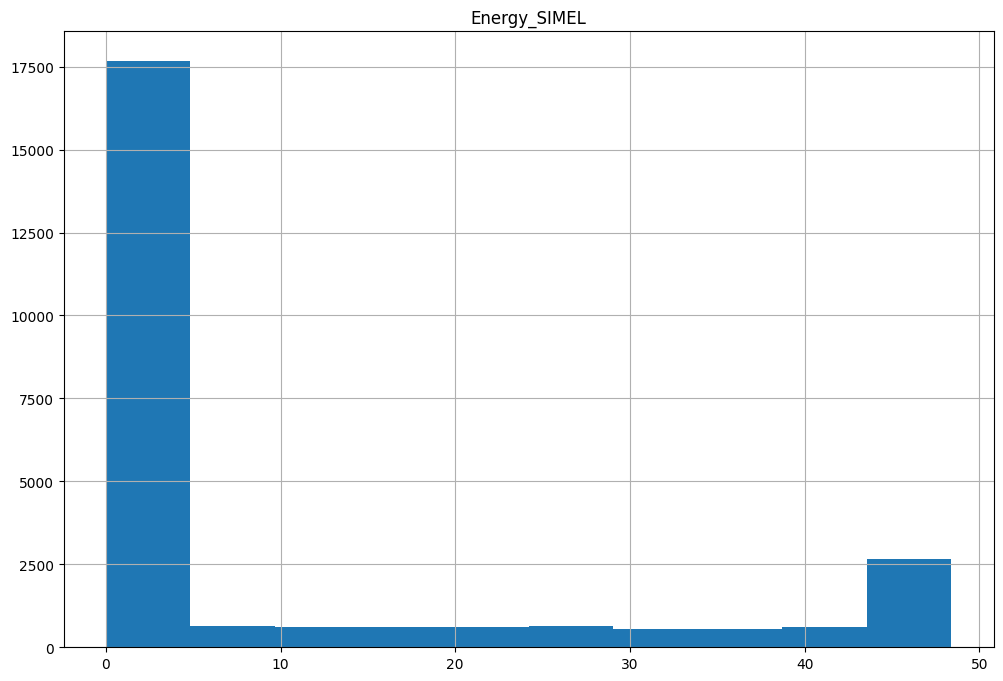

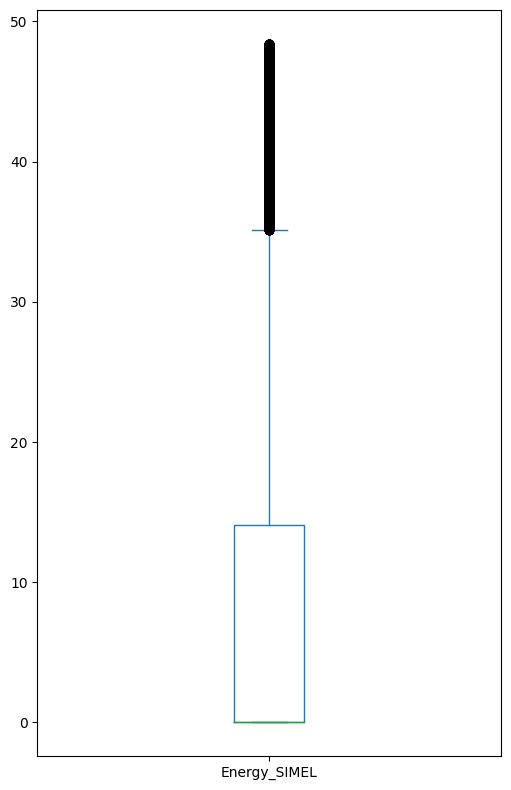

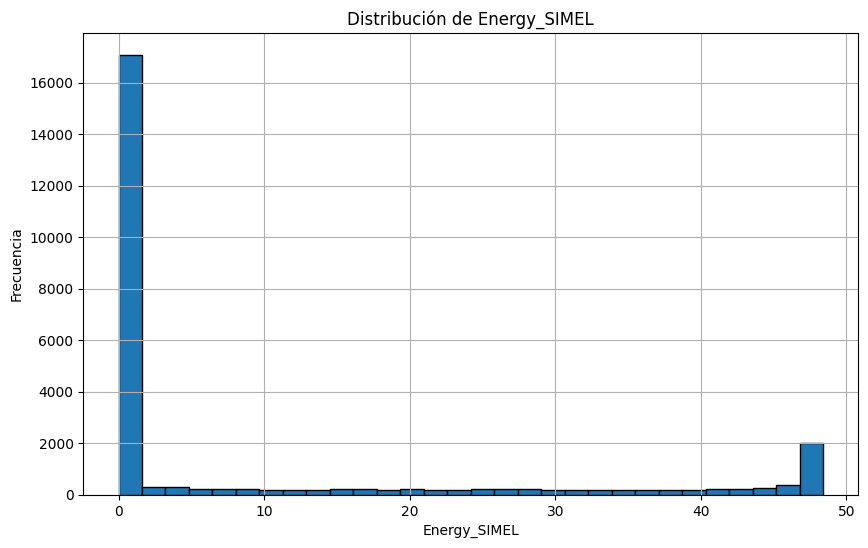

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/ENERGIA_BRUTO.csv'
df = pd.read_csv(ruta_archivo)

# Inspección
print(df.head())
print(df.info())

# Verificación de Datos
print("Tipos de Datos:")
print(df.dtypes)

# Conversión de Datos
df = pd.read_csv(ruta_archivo, delimiter=';')

# Conversión de tipos
df['Period'] = pd.to_numeric(df['Period'], errors='coerce').astype('Int64')
df['Energy_SIMEL'] = pd.to_numeric(df['Energy_SIMEL'], errors='coerce')
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Year'] = df['Year'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')
df['Day'] = df['Day'].astype('Int64')

# Verificar los tipos de datos después de la conversión
print(df.dtypes)

# Eliminamos variables que no aportan
df = df.drop(['Year', 'Month', 'Day', 'Period'], axis=1)
# Realizamos EDA


# Estadísticas Descriptivas
# Descripción de Datos Numéricos
print("Estadísticas Descriptivas (Datos Numéricos):")
print(df.describe(include=[np.number]))

# Descripción de Datos Categóricos
print("Estadísticas Descriptivas (Datos Categóricos):")
print(df.describe(include=['object']))

# Limpieza de Datos
df = df.dropna()

# Visualización de Datos
# Histogramas para Datos Numéricos
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.hist(figsize=(12, 8))
plt.show()

# solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
n_cols = df_numeric.shape[1]
n_rows = n_cols // 2 if n_cols % 2 == 0 else (n_cols // 2) + 1

# Trazar el diagrama de cajas
df_numeric.plot(kind='box', subplots=True, layout=(n_rows, 2), figsize=(10, 8), sharex=False, sharey=False)

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()

# Historigrama
plt.figure(figsize=(10, 6))  # Configurar el tamaño de la figura
plt.hist(df['Energy_SIMEL'], bins=30, edgecolor='black')  # Crear histograma
plt.title('Distribución de Energy_SIMEL')  # Añadir título
plt.xlabel('Energy_SIMEL')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.show()  # Mostrar el histograma
